## Libraries Import

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Goal and Data Used

**The main goal of this notebook is to perform a general data anlysis to find correlations between the different columns in the data set.**

Some of the questions that are looked to be answered are:
- Which where the top 5 most streamed songs in Spotify in 2023?
- Historically which month has the most amount of release amoung the dataset?
- Which are the most commonly used BPM?
- Which songs appear in the most amount of playlists including Apple, Deezer and Spotify together?
- Which of the two modes is the most commonly used?
- the frequency of use of each key

## Data exploration

In [3]:
spotify_data = pd.read_csv("spotify-2023.csv", encoding='ISO-8859-1')

spotify_data.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [4]:
spotify_data.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


## Data visualization

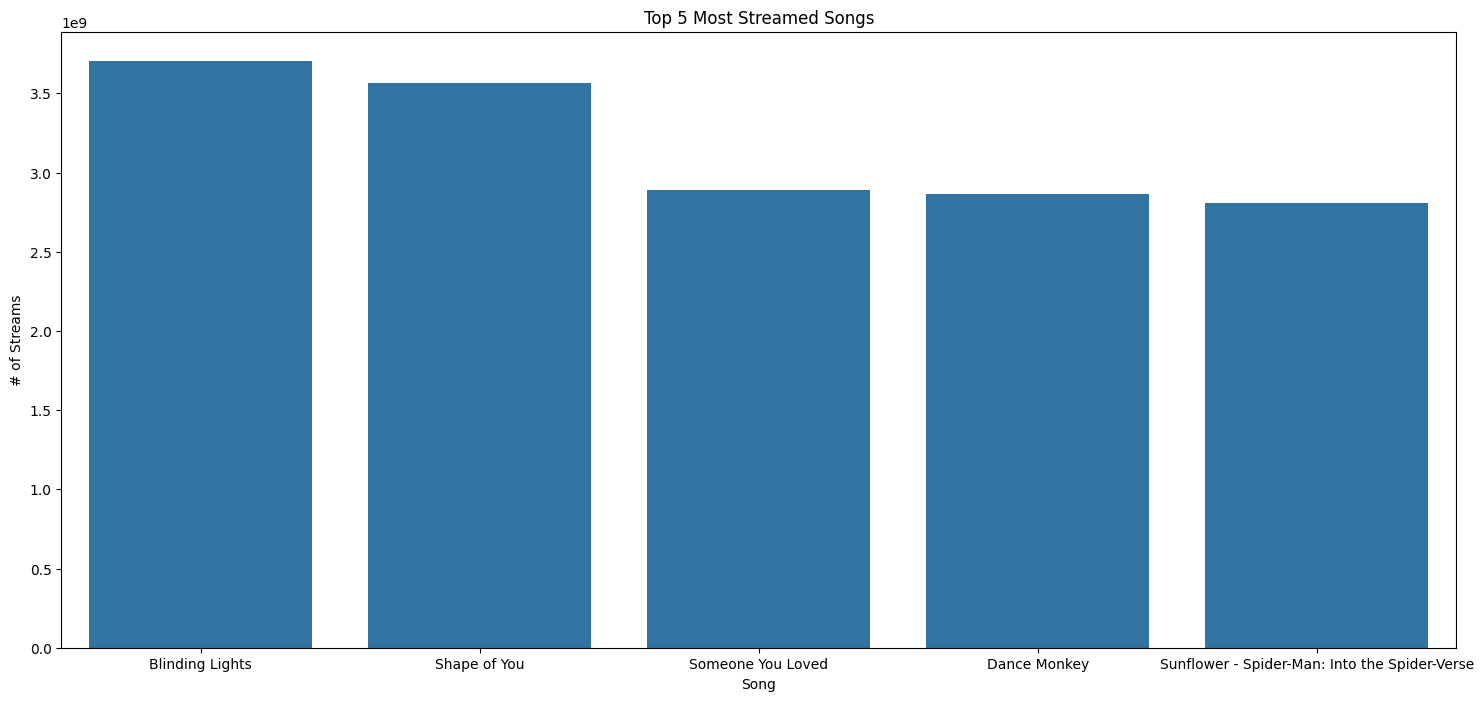

In [5]:
streaming_data = pd.DataFrame().assign(
    track_name=spotify_data["track_name"], 
    streams=spotify_data["streams"]
)

streaming_data["streams"] = pd.to_numeric(streaming_data["streams"], errors="coerce")
streaming_data.dropna(inplace=True)

sorted_songs = streaming_data.sort_values("streams", ascending=False)

plt.figure(figsize=(18, 8))
sns.barplot(sorted_songs[:5], x="track_name", y="streams")
plt.title("Top 5 Most Streamed Songs")
plt.xlabel("Song")
plt.ylabel("# of Streams")
plt.show()

/var/folders/4r/s47z05_96yv_kx9y0p08mlkh0000gn/T/ipykernel_1415/3959770111.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(spotify_data, x="released_month", order=list(month_mappings.values()), palette="husl")


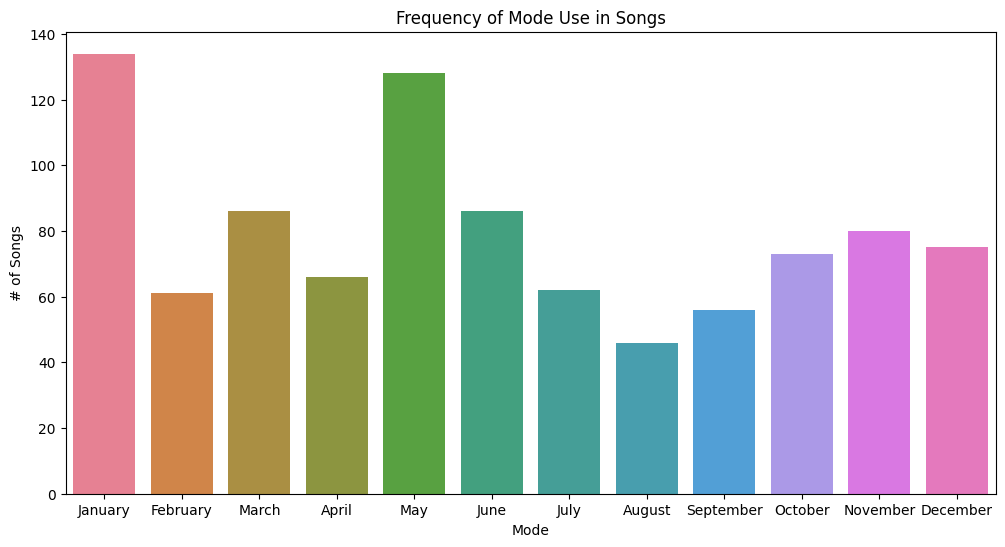

In [27]:
month_mappings = {
    1: "January",
    2: "February",
    3: "March",
    4: "April",
    5: "May",
    6:"June",
    7: "July",
    8: "August",
    9: "September",
    10: "October",
    11: "November",
    12: "December"
}

if pd.api.types.is_numeric_dtype(spotify_data["released_month"]):
    spotify_data["released_month"] = spotify_data["released_month"].map(month_mappings)

plt.figure(figsize=(12, 6))
sns.countplot(spotify_data, x="released_month", order=list(month_mappings.values()), palette="husl")
plt.title("Frequency of Mode Use in Songs")
plt.xlabel("Mode")
plt.ylabel("# of Songs")
plt.show()


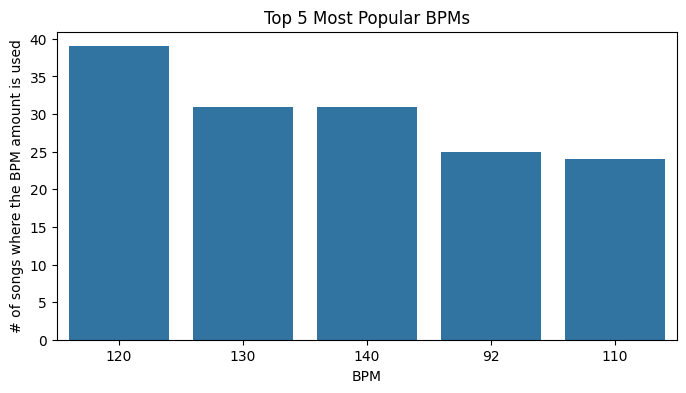

In [7]:
bpms = spotify_data["bpm"]
bpms = bpms.value_counts()

plt.figure(figsize=(8, 4))
sns.barplot(x=bpms.index[:5], y=bpms.values[:5], order=bpms.index[:5])
plt.title("Top 5 Most Popular BPMs")
plt.xlabel("BPM")
plt.ylabel("# of songs where the BPM amount is used")
plt.show()

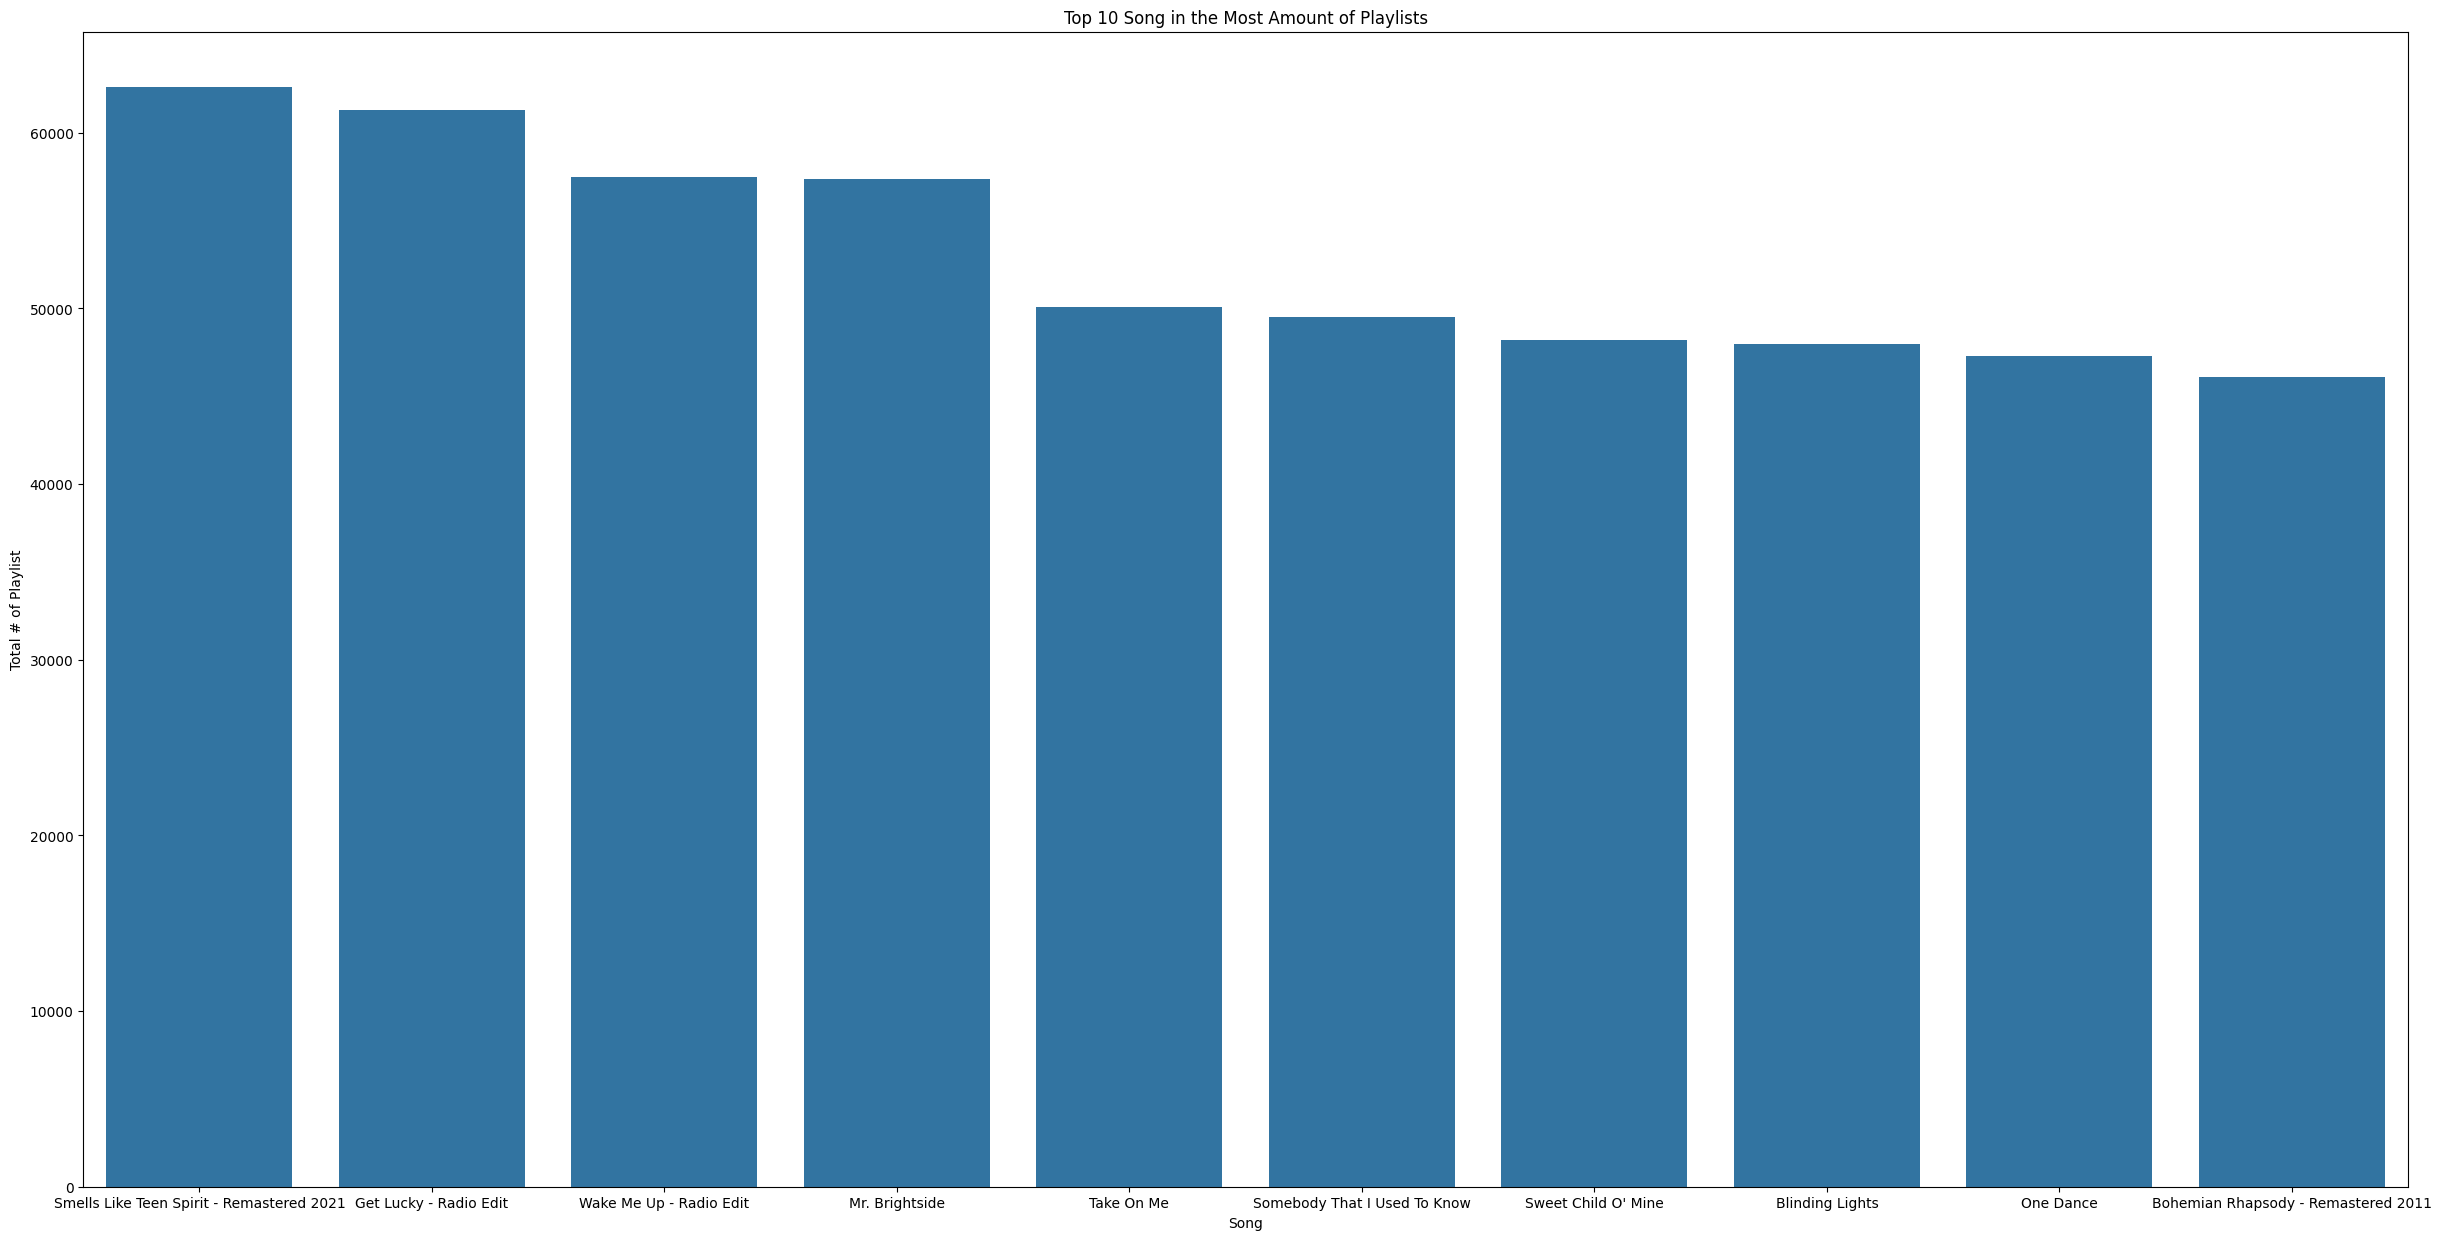

In [8]:
palylist_data = pd.DataFrame().assign(
    track_name=spotify_data["track_name"], 
    in_spotify_playlists=spotify_data["in_spotify_playlists"],
    in_apple_playlists=spotify_data["in_apple_playlists"],
    in_deezer_playlists=spotify_data["in_deezer_playlists"]
)

palylist_data['in_deezer_playlists'] = palylist_data['in_deezer_playlists'].str.replace(',', '').astype(int)

palylist_data["total"] = palylist_data["in_spotify_playlists"] + palylist_data["in_apple_playlists"] + palylist_data["in_deezer_playlists"]
palylist_data.sort_values("total", inplace=True, ascending=False)

plt.figure(figsize=(30, 15))
sns.barplot(palylist_data[:10], x="track_name", y="total")
plt.title("Top 10 Song in the Most Amount of Playlists")
plt.xlabel("Song")
plt.ylabel("Total # of Playlist")
plt.show()

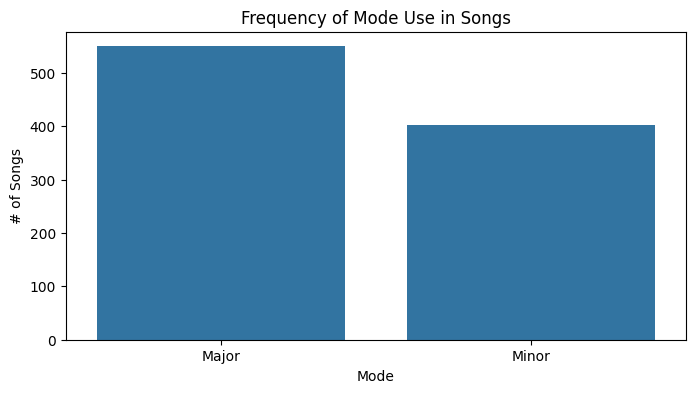

In [12]:
plt.figure(figsize=(8, 4))
sns.countplot(spotify_data, x="mode")
plt.title("Frequency of Mode Use in Songs")
plt.xlabel("Mode")
plt.ylabel("# of Songs")
plt.show()

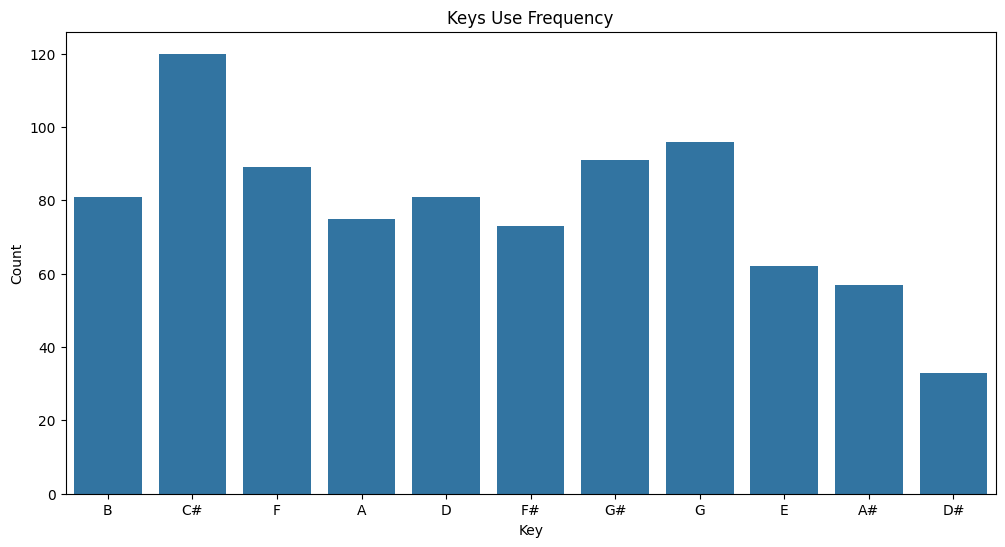

In [30]:
plt.figure(figsize=(12, 6))
sns.countplot(spotify_data, x="key")
plt.title("Keys Use Frequency")
plt.xlabel("Key")
plt.ylabel("Count")
plt.show()